In [1]:
import pandas as pd

In [7]:
from google.colab import files
myfile = files.upload()

Saving save_scaled_test.csv to save_scaled_test.csv
Saving save_scaled_train.csv to save_scaled_train.csv
Saving test.csv to test.csv


In [8]:
save_scaled_test = pd.read_csv('save_scaled_test.csv')
save_scaled_train = pd.read_csv('save_scaled_train.csv')

In [33]:
save_scaled_test.head(2)

,Unnamed: 0,일별,save_scaled_test
0,516,2019-06-01,0.65297291
1,517,2019-06-02,0.37217187


In [34]:
save_scaled_train.head(2)

,Unnamed: 0,일별,save_scaled_train
0,0,2018-01-01,0.25806144
1,1,2018-01-02,0.69187649


In [32]:
import re
scaled_test = save_scaled_test
scaled_test['save_scaled_test'] = scaled_test['save_scaled_test'].astype('str')

for i in range(len(scaled_test)):
  scaled_test['save_scaled_test'][i] = scaled_test['save_scaled_test'][i].replace('[','')
  scaled_test['save_scaled_test'][i] = scaled_test['save_scaled_test'][i].replace(']','')

scaled_test = scaled_test[['일별','save_scaled_test']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [31]:
scaled_train = save_scaled_train
scaled_train['save_scaled_train'] = scaled_train['save_scaled_train'].astype('str')

for i in range(len(scaled_train)):
  scaled_train['save_scaled_train'][i] = scaled_train['save_scaled_train'][i].replace('[','')
  scaled_train['save_scaled_train'][i] = scaled_train['save_scaled_train'][i].replace(']','')

scaled_train = scaled_train[['일별','save_scaled_train']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [48]:
scaled_train['save_scaled_train'] = pd.to_numeric(scaled_train['save_scaled_train'])
scaled_test['save_scaled_test'] = pd.to_numeric(scaled_test['save_scaled_test'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
scaled_train_v = scaled_train.filter(['save_scaled_train']).values
scaled_test_v = scaled_test.filter(['save_scaled_test']).values

In [50]:
PAST_SET = 10

In [51]:
X_train =[]
y_train =[]

for i in range(PAST_SET, len(scaled_train_v)):
  X_train.append(scaled_train_v[i-PAST_SET:i, 0])
  y_train.append(scaled_train_v[i,0])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM은 3D
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

### LSTM 모델

In [52]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1) ))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [53]:
model.compile(loss='mean_squared_error',
              optimizer='adam')

In [54]:
model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
34/34 [==============================] - 4s 10ms/step - loss: 0.1865
Epoch 2/5
34/34 [==============================] - 0s 11ms/step - loss: 0.0291
Epoch 3/5
34/34 [==============================] - 0s 10ms/step - loss: 0.0259
Epoch 4/5
34/34 [==============================] - 0s 10ms/step - loss: 0.0240
Epoch 5/5
34/34 [==============================] - 0s 10ms/step - loss: 0.0252


In [56]:
X_test = []

for i in range(PAST_SET, len(scaled_test_v)):
  X_test.append(scaled_test_v[i-PAST_SET:i, 0])

X_test = np.array(X_test)

# LSTM은 3D
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [63]:
from sklearn.preprocessing import MinMaxScaler

scalar = MinMaxScaler(feature_range=(0,1))

scalared_test = [[40000],[500]]
scalar.fit_transform(scalared_test)

array([[1.],
       [0.]])

In [77]:
X_train.shape

(506, 10, 1)

In [76]:
X_test.shape

(570, 10, 1)

In [92]:
predictions = model.predict(X_test)

predictions = scalar.inverse_transform(predictions)
# predictions

In [88]:
len(predictions)

570

In [78]:
pre_train =  scalar.inverse_transform(scaled_train_v)
pre_test =  scalar.inverse_transform(scaled_test_v)

In [89]:
len(pre_test)

580

In [80]:
save_scaled_test
save_scaled_train

,Unnamed: 0,일별,save_scaled_train
0,0,2018-01-01,0.25806144
1,1,2018-01-02,0.69187649
2,2,2018-01-03,0.6838636
3,3,2018-01-04,0.67653445
4,4,2018-01-05,0.75208106
...,...,...,...
511,511,2019-05-27,0.64612602
512,512,2019-05-28,0.76168757
513,513,2019-05-29,0.7350474
514,514,2019-05-30,0.76625056


In [93]:
train = pd.DataFrame()
test = pd.DataFrame()
train['일별'] = save_scaled_train['일별']
train['카드사용금액계'] = pre_train
test['일별'] = save_scaled_test['일별']
test['카드사용금액계'] = pre_test
prediction = pd.DataFrame()
prediction['일별'] = save_scaled_test['일별'][PAST_SET:]
prediction['카드사용금액계'] = pre_test[PAST_SET:]
prediction['예측'] = predictions
prediction

,일별,카드사용금액계,예측
10,2019-06-11,22532.797825,23321.537109
11,2019-06-12,22809.481895,23035.580078
12,2019-06-13,22781.663230,23258.576172
13,2019-06-14,25726.707785,23174.261719
14,2019-06-15,24177.283945,23223.849609
...,...,...,...
575,2020-12-27,4168.303775,22193.759766
576,2020-12-28,22972.316300,21608.863281
577,2020-12-29,24506.662990,21167.783203
578,2020-12-30,24241.830105,21171.392578


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


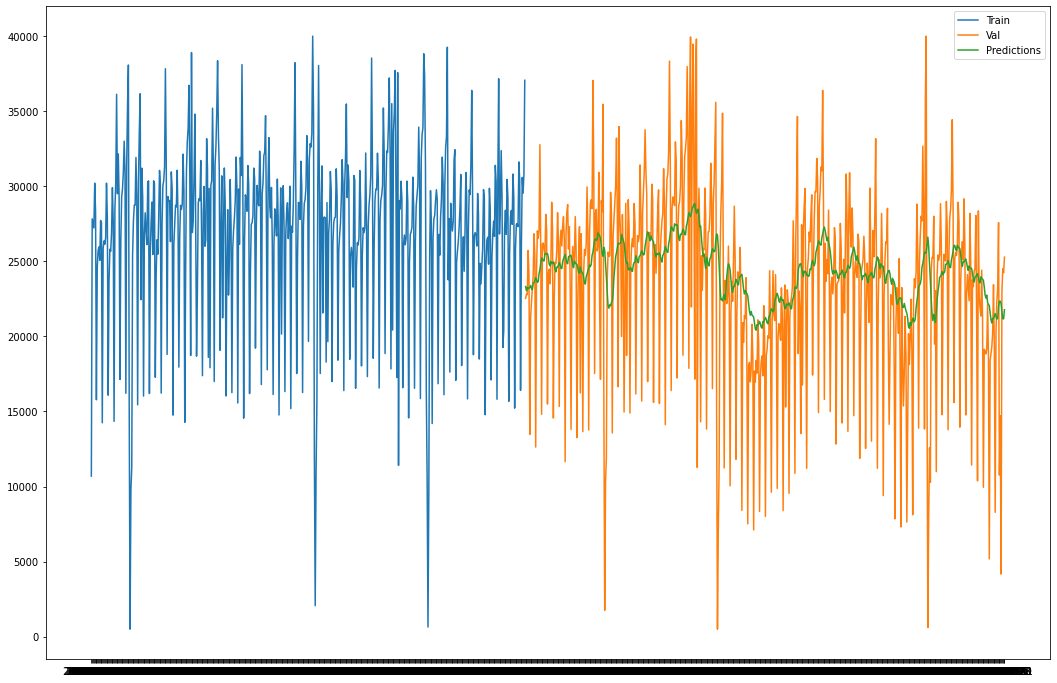

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,12))
plt.plot(train['일별'],train['카드사용금액계'])
plt.plot(prediction['일별'], prediction[['카드사용금액계','예측']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

## LSTM 모델2



In [127]:
import tensorflow as tf

multi_step_model = tf.keras.models.Sequential() 
multi_step_model.add(tf.keras.layers.LSTM(32, return_sequences=True, input_shape=(X_train.shape[1],1))) 
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu')) 
multi_step_model.add(tf.keras.layers.Dense(32, activation='relu')) 
multi_step_model.add(tf.keras.layers.Dense(1)) 
multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

In [128]:
multi_step_model.fit(X_train, y_train, batch_size=15, epochs=5)

Epoch 1/5
34/34 [==============================] - 3s 8ms/step - loss: 0.2975
Epoch 2/5
34/34 [==============================] - 0s 8ms/step - loss: 0.1134
Epoch 3/5
34/34 [==============================] - 0s 8ms/step - loss: 0.1148
Epoch 4/5
34/34 [==============================] - 0s 8ms/step - loss: 0.1130
Epoch 5/5
34/34 [==============================] - 0s 8ms/step - loss: 0.1130


In [129]:
multi_step_predictions = multi_step_model.predict(X_test)
multi_step_predictions = scalar.inverse_transform(multi_step_predictions)
# multi_step_predictions

In [130]:
multi_step_prediction = pd.DataFrame()
multi_step_prediction['일별'] = save_scaled_test['일별'][PAST_SET:]
multi_step_prediction['카드사용금액계'] = pre_test[PAST_SET:]
multi_step_prediction['예측'] = multi_step_predictions
multi_step_prediction.head()

,일별,카드사용금액계,예측
10,2019-06-11,22532.797825,26198.986328
11,2019-06-12,22809.481895,25786.615234
12,2019-06-13,22781.663230,26244.701172
13,2019-06-14,25726.707785,26021.109375
14,2019-06-15,24177.283945,25898.164062


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


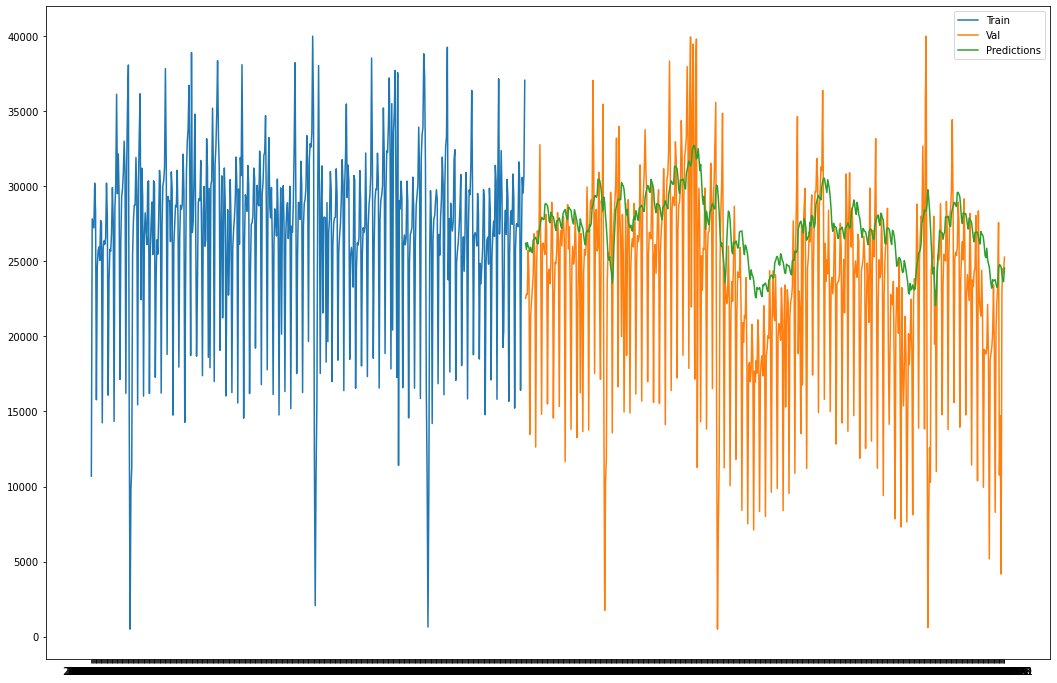

In [131]:
plt.figure(figsize=(18,12))
plt.plot(train['일별'],train['카드사용금액계'])
plt.plot(multi_step_prediction['일별'], multi_step_prediction[['카드사용금액계','예측']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

## LSTM 모델3

In [132]:
from keras.layers import Flatten,Dense

new_model = Sequential() 
new_model.add(LSTM(64, activation=None, input_shape=(X_train.shape[1],1), return_sequences = True)) 
new_model.add(LSTM(32, activation=None, return_sequences = True)) 
new_model.add(Flatten()) 
new_model.add(Dense(50, activation=None))
new_model.add(Dense(1, activation='sigmoid')) 
new_model.compile(loss='mse', optimizer='adam')


In [133]:
new_model.fit(X_train, y_train, batch_size=15, epochs=10)

Epoch 1/10
34/34 [==============================] - 4s 11ms/step - loss: 0.0311
Epoch 2/10
34/34 [==============================] - 0s 10ms/step - loss: 0.0209
Epoch 3/10
34/34 [==============================] - 0s 10ms/step - loss: 0.0262
Epoch 4/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0262
Epoch 5/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0269
Epoch 6/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0236
Epoch 7/10
34/34 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 8/10
34/34 [==============================] - 0s 10ms/step - loss: 0.0234
Epoch 9/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0235
Epoch 10/10
34/34 [==============================] - 0s 9ms/step - loss: 0.0261


In [134]:
new_model_predictions = new_model.predict(X_test)
new_model_predictions = scalar.inverse_transform(new_model_predictions)

In [135]:
new_model_prediction = pd.DataFrame()
new_model_prediction['일별'] = save_scaled_test['일별'][PAST_SET:]
new_model_prediction['카드사용금액계'] = pre_test[PAST_SET:]
new_model_prediction['예측'] = new_model_predictions
new_model_prediction.head()

,일별,카드사용금액계,예측
10,2019-06-11,22532.797825,28328.119141
11,2019-06-12,22809.481895,28275.716797
12,2019-06-13,22781.663230,28248.880859
13,2019-06-14,25726.707785,28162.068359
14,2019-06-15,24177.283945,28045.814453


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


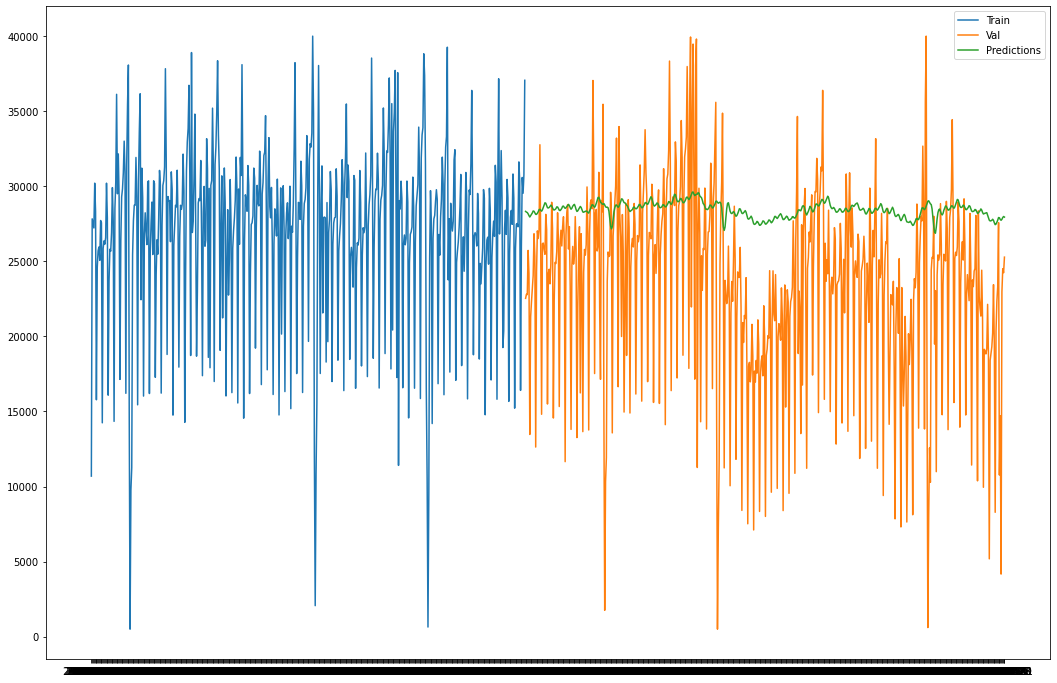

In [136]:
plt.figure(figsize=(18,12))
plt.plot(train['일별'],train['카드사용금액계'])
plt.plot(new_model_prediction['일별'], new_model_prediction[['카드사용금액계','예측']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

## CNN 모델


In [122]:
from keras.models import Sequential 
from keras.layers import Dense 
from keras.layers import Flatten 
from keras.layers import Dropout 
from keras.layers.convolutional import Conv1D 
from keras.layers.convolutional import MaxPooling1D 
cnn_model = Sequential() 
cnn_model.add(Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1))) 
cnn_model.add(Conv1D(filters=64, kernel_size=3, activation='relu')) 
cnn_model.add(MaxPooling1D(pool_size=2)) 
cnn_model.add(Flatten()) 
cnn_model.add(Dense(100, activation='relu')) 
cnn_model.add(Dense(1, activation='sigmoid')) 
cnn_model.compile(loss='mse', optimizer='adam')


In [123]:
cnn_model.fit(X_train, y_train, batch_size=15, epochs=10)

Epoch 1/10
34/34 [==============================] - 3s 3ms/step - loss: 0.0328
Epoch 2/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0191
Epoch 3/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 4/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0156
Epoch 5/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 6/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 7/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0114
Epoch 8/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0101
Epoch 9/10
34/34 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 10/10
34/34 [==============================] - 0s 3ms/step - loss: 0.0095


In [124]:
cnn_model_predictions = cnn_model.predict(X_test)
cnn_model_predictions = scalar.inverse_transform(cnn_model_predictions)

In [125]:
cnn_model_prediction = pd.DataFrame()
cnn_model_prediction['일별'] = save_scaled_test['일별'][PAST_SET:]
cnn_model_prediction['카드사용금액계'] = pre_test[PAST_SET:]
cnn_model_prediction['예측'] = cnn_model_predictions
cnn_model_prediction.head()

,일별,카드사용금액계,예측
10,2019-06-11,22532.797825,30264.353516
11,2019-06-12,22809.481895,29683.625000
12,2019-06-13,22781.663230,21654.898438
13,2019-06-14,25726.707785,29519.365234
14,2019-06-15,24177.283945,27000.691406


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


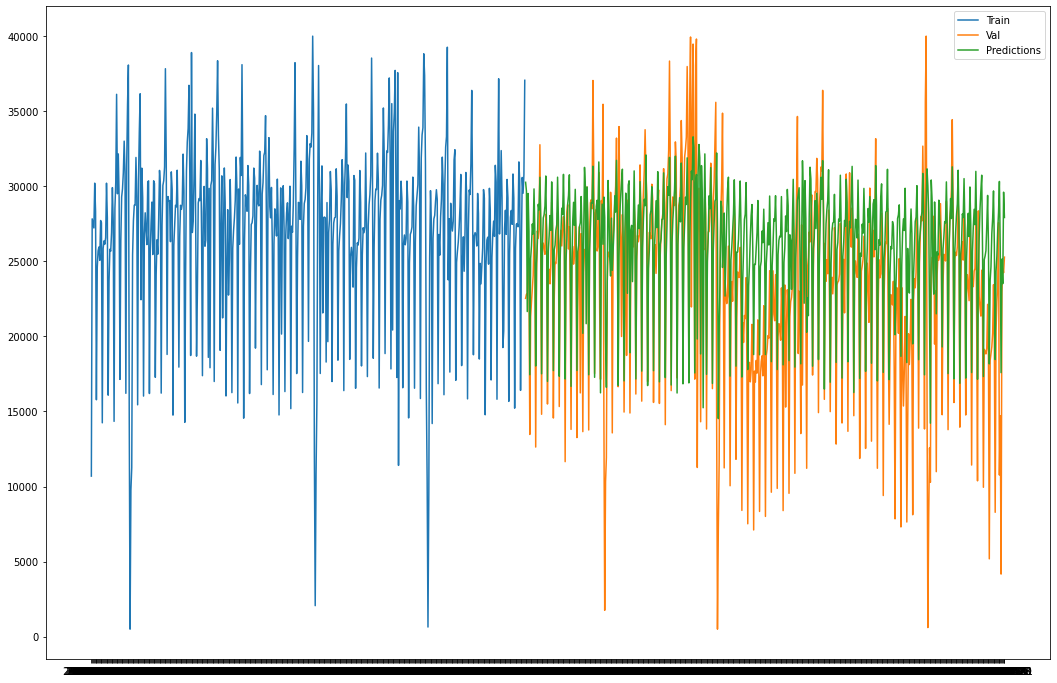

In [126]:
plt.figure(figsize=(18,12))
plt.plot(train['일별'],train['카드사용금액계'])
plt.plot(cnn_model_prediction['일별'], cnn_model_prediction[['카드사용금액계','예측']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


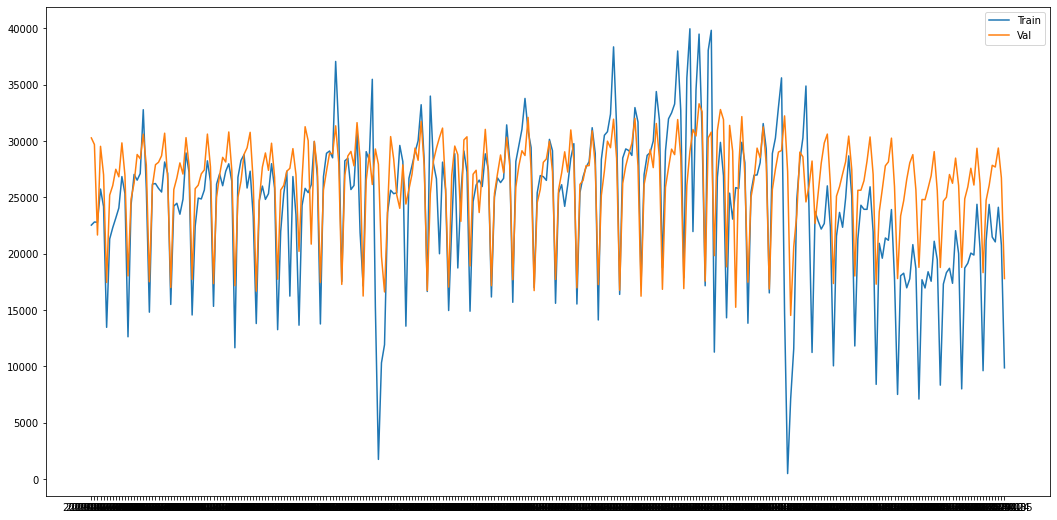

In [163]:
plt.figure(figsize=(18,9))
plt.plot(cnn_model_prediction['일별'][:300], cnn_model_prediction[['카드사용금액계','예측']][:300])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

## LSTM & CNN 모델


In [155]:
hap_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=128, kernel_size=3, activation='relu', input_shape=(X_train.shape[1],1)),
  tf.keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu'),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(16, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dense(1, activation='sigmoid'),
])

hap_model.compile(loss='mse', optimizer='adam') 

In [156]:
hap_model.fit(X_train, y_train, batch_size=15, epochs=10)

Epoch 1/10
34/34 [==============================] - 3s 8ms/step - loss: 0.0366
Epoch 2/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0240
Epoch 3/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 4/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0229
Epoch 5/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0233
Epoch 6/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0232
Epoch 7/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0227
Epoch 8/10
34/34 [==============================] - 0s 7ms/step - loss: 0.0225
Epoch 9/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 10/10
34/34 [==============================] - 0s 8ms/step - loss: 0.0171


In [157]:
hap_model_predictions = hap_model.predict(X_test)
hap_model_predictions = scalar.inverse_transform(hap_model_predictions)

In [159]:
hap_model_prediction = pd.DataFrame()
hap_model_prediction['일별'] = save_scaled_test['일별'][PAST_SET:]
hap_model_prediction['카드사용금액계'] = pre_test[PAST_SET:]
hap_model_prediction['예측'] = hap_model_predictions
hap_model_prediction.head()

,일별,카드사용금액계,예측
10,2019-06-11,22532.797825,27554.839844
11,2019-06-12,22809.481895,28340.113281
12,2019-06-13,22781.663230,23968.033203
13,2019-06-14,25726.707785,25821.398438
14,2019-06-15,24177.283945,27320.570312


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  after removing the cwd from sys.path.


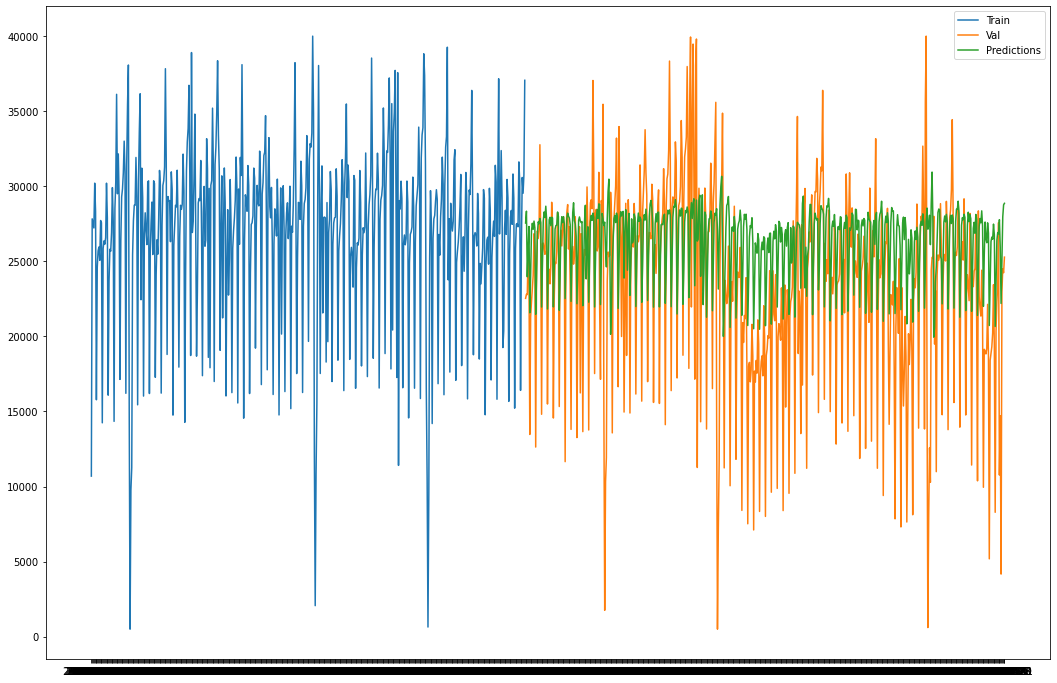

In [160]:
plt.figure(figsize=(18,12))
plt.plot(train['일별'],train['카드사용금액계'])
plt.plot(hap_model_prediction['일별'], hap_model_prediction[['카드사용금액계','예측']])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Unrecognized location 'low'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  This is separate from the ipykernel package so we can avoid doing imports until


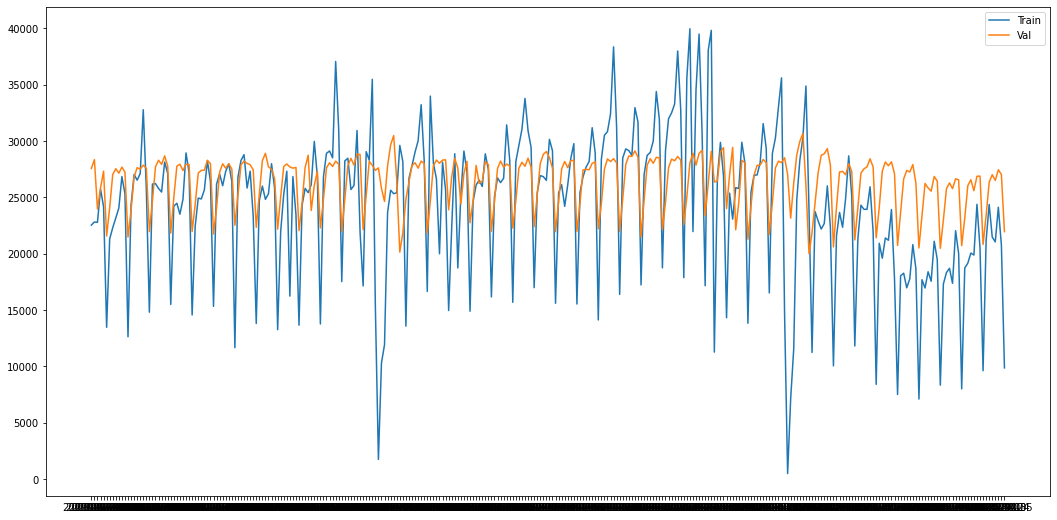

In [164]:
plt.figure(figsize=(18,9))
plt.plot(hap_model_prediction['일별'][:300], hap_model_prediction[['카드사용금액계','예측']][:300])
plt.legend(['Train', 'Val', 'Predictions'], loc='low')